## H1N1 Vaccine Uptake Prediction

## Business Understanding

Influenza vaccines play a critical role in reducing the spread and severity of flu outbreaks. Despite the availability of the H1N1 vaccine following the 2009 pandemic, vaccine uptake remained uneven due to factors such as risk perception, misinformation, and behavioral attitudes.

This project aims to predict whether an individual received the H1N1 vaccine using demographic information, health behaviors, and personal opinions collected from the National 2009 H1N1 Flu Survey. The primary stakeholders are public health officials and policymakers, who can use these insights to design targeted vaccination campaigns and address vaccine hesitancy.

The scope of this project is limited to predicting vaccine uptake and identifying influential factors. It does not evaluate vaccine effectiveness, distribution logistics, or policy outcomes.

# Data Understanding

The data for this project comes from three datasets: `training_set_features.csv`, `test_set_features.csv`, and `training_set_labels.csv`. The primary target variable for this analysis is whether an individual received the H1N1 vaccine (`h1n1_vaccine`), while predictors include demographic, health-related, and behavioral features such as age, income, health concerns, and vaccination recommendations.

The datasets contain both categorical (e.g., age group, marital status) and numerical (e.g., household adults,household children ) features, including some binary and ordinal variables. The size and distribution of the datasets will be examined during exploration. If necessary, resampling techniques may be applied to address imbalances in the target variable.

The data is collected via surveys, which means it may include missing values, biases, or inconsistencies. These issues will require careful cleaning and preprocessing before building predictive models. 


# Data Preparation

In [51]:
# import pandas
import pandas as pd

# Loading the training features 
training_features_df = pd.read_csv("./Data/training_set_features.csv")

# Displaying the first few rows
training_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [52]:
# loading training_labels 
training_labels_df = pd.read_csv("./Data/training_set_labels.csv")

# Displaying the first few rows
training_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [53]:
# loading test_features
test_features_df = pd.read_csv("./Data/test_set_features.csv")

# Displaying the first few rows
test_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [54]:
# checking for missing values in the training_features_df
missing_values = training_features_df.isnull().sum()
print(missing_values)
# check the shape of the dataframe
training_features_df.shape

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

(26707, 36)

In [55]:
#checking for missing values in the test_features_df
missing_values2 = test_features_df.isnull().sum()
print(missing_values2)

#check the shape of the dataframe
test_features_df.shape

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

(26708, 36)

From the findings above we can see that some columns have relatively small numbers of missing values, such as h1n1_concern (92 missing) and behavioral_face_mask (19 missing).

However, certain columns have a very large number of missing values, like doctor_recc_h1n1, doctor_recc_seasonal, health_insurance, and others related to employment (employment_industry, employment_occupation), which have thousands of missing entries.

The dataset has 26,707 rows and 36 columns

In [56]:
# Display summary of the DataFrame
training_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### Consider Dropping Rows or Columns

For columns have an excessive amount of missing data such as employment_occupation or employment_industry drop them entirely

In [57]:
# Drop columns with too many missing values 
training_features_df.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)
test_features_df.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)

Numerical Columns: Use strategies such as the mean, median, or mode for imputation depending on the distribution of the data.

Categorical Columns: Replace missing values with the mode or a placeholder value like "Unknown".

In [58]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with the median
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 
                  'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
                  'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 
                  'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 
                  'child_under_6_months', 'health_worker', 'health_insurance', 
                  'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 
                  'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 
                  'household_adults', 'household_children']

numerical_imputer = SimpleImputer(strategy='median')  
numerical_imputer.fit(training_features_df[numerical_cols]) 

SimpleImputer(strategy='median')

In [59]:
# Transform both training and test datasets
training_features_df[numerical_cols] = numerical_imputer.transform(training_features_df[numerical_cols])
test_features_df[numerical_cols] = numerical_imputer.transform(test_features_df[numerical_cols])

In [60]:
# Impute missing values for categorical columns with the mode (most frequent value)
categorical_cols = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 
                    'employment_status']

categorical_imputer = SimpleImputer(strategy='most_frequent')  
categorical_imputer.fit(training_features_df[categorical_cols])

# Transform both training and test datasets
training_features_df[categorical_cols] = categorical_imputer.transform(training_features_df[categorical_cols])
test_features_df[categorical_cols] = categorical_imputer.transform(test_features_df[categorical_cols])

In [61]:
# Verify there are no remaining missing values
print(training_features_df.isnull().sum().sum())
print(test_features_df.isnull().sum().sum())


0
0


From the findings above we can see that some columns have relatively small numbers of missing values, such as h1n1_concern (85 missing) and behavioral_face_mask (19 missing).

However, certain columns have a very large number of missing values, like doctor_recc_h1n1, doctor_recc_seasonal, health_insurance, and others related to employment (employment_industry, employment_occupation), which have thousands of missing entries.

In [62]:
#checking for missing values in the training_labels_df
missing_values2 = training_labels_df.isnull().sum()
print(missing_values2)
#check the shape of the dataframe
training_labels_df.shape

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64


(26707, 3)

From the findings above we can see that the training_labels_df doesn't contain any missing values

### Checking for Duplicates
Duplicate records in a dataset can skew analysis and negatively impact model performance.

In [63]:
# Check for duplicate rows
duplicate_rows = training_features_df[training_features_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children]
Index: []

[0 rows x 34 columns]


In [64]:
#Check for duplicate rows
duplicate_rows = test_features_df[test_features_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children]
Index: []

[0 rows x 34 columns]


In [65]:
duplicate_rows = training_labels_df[training_labels_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_vaccine, seasonal_vaccine]
Index: []


After checking for duplicates, we found none in the dataset.

## Data Visualizations
### Distribution of Target Variables
Purpose:Understand the balance of target variables (h1n1_vaccine).

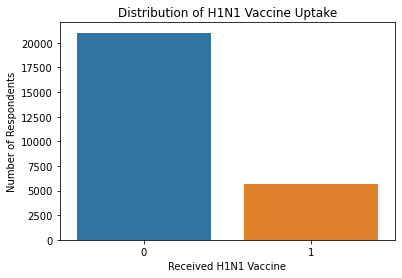

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='h1n1_vaccine', data=training_labels_df)
plt.title('Distribution of H1N1 Vaccine Uptake')
plt.xlabel('Received H1N1 Vaccine')
plt.ylabel('Number of Respondents')
plt.show()


H1N1 Vaccine Distribution:

The majority of respondents (label 0) did not receive the H1N1 vaccine. A smaller proportion of respondents (label 1) received the vaccine. This indicates an imbalance in the target variable, as the number of people who did not take the H1N1 vaccine is significantly higher than those who did.


#### Doctor Recommendation vs H1N1 Vaccine Uptake

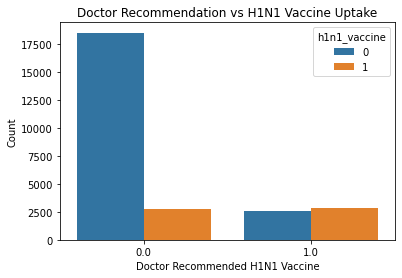

In [67]:
sns.countplot(
    data=training_features_df.join(training_labels_df['h1n1_vaccine']),
    x='doctor_recc_h1n1',
    hue='h1n1_vaccine'
)
plt.title('Doctor Recommendation vs H1N1 Vaccine Uptake')
plt.xlabel('Doctor Recommended H1N1 Vaccine')
plt.ylabel('Count')
plt.show()


0 is where the doctor did not reccomend and 1 is where the doctor reccomended. When doctor reccoended the vaccine ,uptake was high showing it is a strong predictor.

#### Risk Perception vs Vaccine Uptake

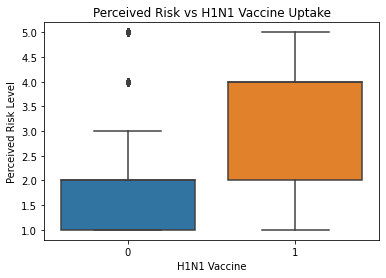

In [68]:
sns.boxplot(
    data=training_features_df.join(training_labels_df['h1n1_vaccine']),
    x='h1n1_vaccine',
    y='opinion_h1n1_risk'
)
plt.title('Perceived Risk vs H1N1 Vaccine Uptake')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Perceived Risk Level')
plt.show()


Vaccinated people(1) have a higher risk perception compared to non-vaccinated people(0).This shows that people who percieve H1N1 as riskier are more likely to get vaccinated.

#### Concern Level vs Vaccine Uptake

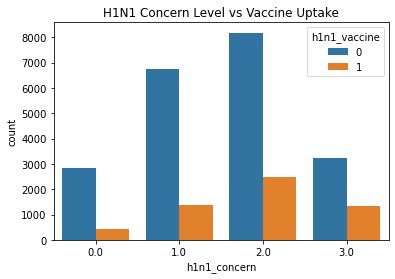

In [69]:
sns.countplot(
    data=training_features_df.join(training_labels_df['h1n1_vaccine']),
    x='h1n1_concern',
    hue='h1n1_vaccine'
)
plt.title('H1N1 Concern Level vs Vaccine Uptake')
plt.show()


Concern level scale(0-3) wheere higher is more concerned nshows that the higher the concern level, the more the vaccinations.

### Vaccine Uptake by Income Level
Purpose: Understand how income_poverty influences vaccine uptake.


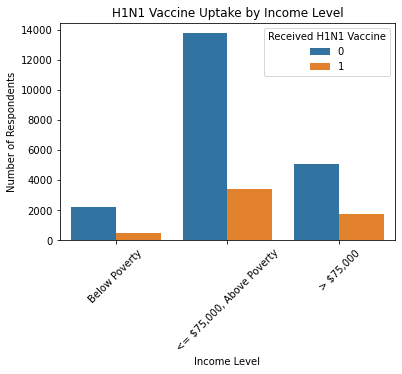

In [70]:
merged_train = training_features_df.merge(
    training_labels_df[['respondent_id', 'h1n1_vaccine']],
    on='respondent_id'
)

sns.countplot(
    data=merged_train,
    x='income_poverty',
    hue='h1n1_vaccine'
)

plt.title('H1N1 Vaccine Uptake by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Number of Respondents')
plt.legend(title='Received H1N1 Vaccine')
plt.xticks(rotation=45)
plt.show()


- Below Poverty: Smallest group, relatively low uptake but more balanced ratio.
- ≤ $75,000, Above Poverty: Largest group, lowest vaccination rates, contributes most to total unvaccinated.
- Above $75,000: High income, slightly better uptake than middle group but still low.


## Modelling

In [71]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

### Baseline Logistic Regression

**Model Justification:**
Logistic Regression serves as our baseline model because it is:
- Simple and interpretable - coefficients show feature impact
- Fast to train and well-suited for binary classification
- Linear model that establishes minimum performance expectations
- Industry standard for understanding feature relationships

This baseline helps us determine if more complex models are necessary.

In [72]:
# Define feature and target columns
numerical_features = [
    'h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds',
    'behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands',
    'behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face',
    'doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition',
    'child_under_6_months','health_worker','health_insurance',
    'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',
    'household_adults','household_children'
]

categorical_features = [
    'age_group','education','race','sex','income_poverty','marital_status',
    'rent_or_own','employment_status'
]

all_features = numerical_features + categorical_features


In [73]:
# Split data into features (X) and target (y)
X = training_features_df[all_features]
y = training_labels_df['h1n1_vaccine']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [74]:
# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)


In [75]:
# Create pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced',max_iter=1000
    ))
])

# Train
lr_pipeline.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.7748034444028454
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      4207
           1       0.48      0.72      0.58      1135

    accuracy                           0.77      5342
   macro avg       0.70      0.76      0.71      5342
weighted avg       0.82      0.77      0.79      5342



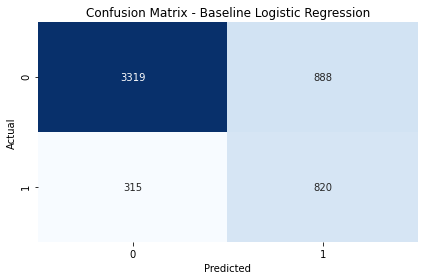

In [76]:
# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix_lr_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

- Given the public health objective of identifying vaccination behavior and minimizing missed cases of vaccinated individuals, models were tuned using recall as the primary evaluation metric. This ensures the model prioritizes capturing as many vaccinated individuals as possible, even at the cost of additional false positives.

#### Hyperparameter Tuning with Logistic Regression
## Tuned Logistic Regression

**Model Justification:**
Building on the baseline, we tune hyperparameters to optimize performance:
- **C parameter:** Controls regularization strength to prevent overfitting
- **Solver:** Different optimization algorithms may converge better
- **Scoring metric:** Using 'recall' aligns with public health goal of identifying potential vaccinees

We expect tuning to improve recall while maintaining reasonable precision.

In [77]:

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'classifier__solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

# Perform Grid Search
grid_search_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr_tuned = grid_search_lr.predict(X_test)
y_pred_proba_lr_tuned = grid_search_lr.predict_proba(X_test)[:, 1]

print(" Tuned Logistic Regression Performance:")
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_tuned))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
 Tuned Logistic Regression Performance:
Tuned Logistic Regression Accuracy: 0.7699363534256832
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      4207
           1       0.47      0.72      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342



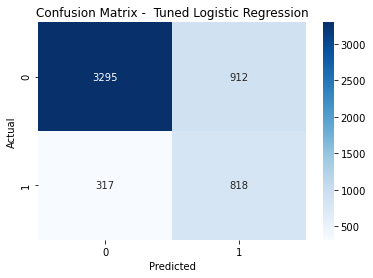

In [78]:
# visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix -  Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Baseline Decision Tree

**Model Justification:**
Decision Trees offer advantages over logistic regression:
- Non-linear decision boundaries: Can capture complex interactions
- No scaling required: Naturally handles different feature scales
- Interpretable: Can visualize decision rules
- Handles mixed data types: Works well with our categorical + numerical features

We expect the tree to capture non-linear patterns that logistic regression might miss.

In [79]:
dt_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)

dt_pipeline = Pipeline([
    ('preprocessor', dt_preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

# Train
dt_pipeline.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7622613253463122
ROC-AUC Score: 0.6486945922937333
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4207
           1       0.44      0.45      0.45      1135

    accuracy                           0.76      5342
   macro avg       0.65      0.65      0.65      5342
weighted avg       0.76      0.76      0.76      5342



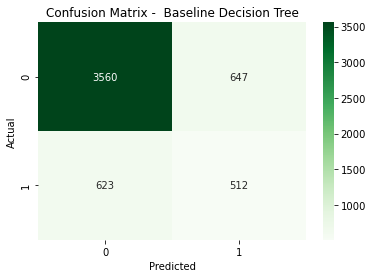

In [80]:
# visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix -  Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Tuned Decision Tree

**Model Justification:**
Decision Trees can easily overfit, so hyperparameter tuning is critical:
- max_depth: Limits tree depth to prevent overfitting
- min_samples_split: Minimum samples needed to split a node
- min_samples_leaf: Minimum samples in leaf nodes
- criterion: Gini vs. entropy for splitting decisions

We use GridSearchCV with 5-fold cross-validation and recall scoring to find optimal parameters that balance model complexity with generalization.

In [81]:
# Define parameter grid
param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Grid search
grid_search_dt = GridSearchCV(
    dt_pipeline,param_grid_dt,cv=5,scoring='recall',n_jobs=-1,verbose=1
)

grid_search_dt.fit(X_train, y_train)

# Predictions with best model
y_pred_dt_tuned = grid_search_dt.predict(X_test)
y_pred_proba_dt_tuned = grid_search_dt.predict_proba(X_test)[:, 1]

# Evaluate
print("Tuned Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_tuned))


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Tuned Decision Tree Performance:
Accuracy: 0.7821040808685885
ROC-AUC Score: 0.8086624034412961
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      4207
           1       0.49      0.68      0.57      1135

    accuracy                           0.78      5342
   macro avg       0.70      0.75      0.71      5342
weighted avg       0.82      0.78      0.79      5342



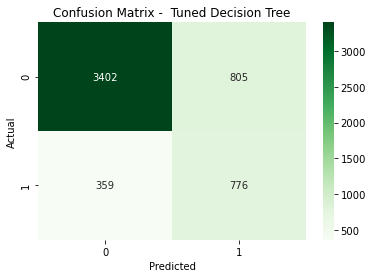

In [82]:
# visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix -  Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Feature Importance Analysis

In [84]:
# Get feature names after preprocessing
ohe = lr_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(cat_feature_names)

# Get coefficients from tuned model
lr_coef = grid_search_lr.best_estimator_.named_steps['classifier'].coef_[0]

# Create dataframe
lr_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lr_coef,
    'Abs_Coefficient': abs(lr_coef)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(lr_importance.head(10).to_string(index=False))



Top 10 Most Important Features:
                     Feature  Coefficient  Abs_Coefficient
            doctor_recc_h1n1     0.769576         0.769576
 opinion_h1n1_vacc_effective     0.570809         0.570809
           opinion_h1n1_risk     0.462933         0.462933
               health_worker     0.261409         0.261409
         age_group_65+ Years     0.220323         0.220323
           opinion_seas_risk     0.199703         0.199703
  marital_status_Not Married    -0.192503         0.192503
        doctor_recc_seasonal    -0.188082         0.188082
     age_group_45 - 54 Years    -0.155722         0.155722
                    sex_Male     0.150373         0.150373


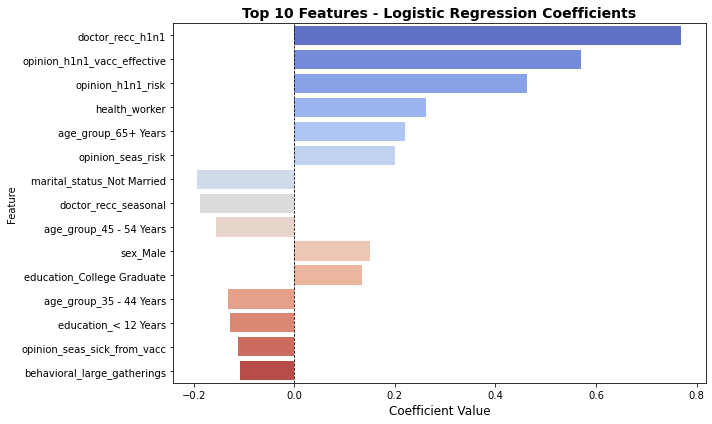

In [85]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lr_importance.head(15),
    x='Coefficient',
    y='Feature',
    palette='coolwarm'
)
plt.title('Top 10 Features - Logistic Regression Coefficients', 
          fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

#### Feature Importance Insights
1. Doctor recommendation is the strongest predictor of H1N1 vaccine uptake
2. Opinions about vaccine effectiveness and risk perception are critical drivers
3. Demographic factors (age, education, income) play secondary but important roles
4. Behavioral factors show moderate predictive power

These findings align with real-world behavioral science and reinforce the validity of the model.

#### Model Comparison

In [89]:

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': [
        'Baseline Logistic Regression',
        'Tuned Logistic Regression',
        'Baseline Decision Tree',
        'Tuned Decision Tree'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_dt_tuned)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_lr_tuned),
        roc_auc_score(y_test, y_pred_proba_dt),
        roc_auc_score(y_test, y_pred_proba_dt_tuned)
    ],
    'F1-Score (Class 1)': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt_tuned)
    ],
    'Recall (Class 1)': [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_lr_tuned, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt_tuned, output_dict=True)['1']['recall']
    ]
})

print(comparison_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['Recall (Class 1)'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_roc_auc = comparison_df.loc[best_model_idx, 'ROC-AUC']

print(f"BEST MODEL: {best_model_name}")
print(f"ROC-AUC Score: {best_roc_auc:.4f}")

                        Model  Accuracy   ROC-AUC  F1-Score (Class 1)  Recall (Class 1)
 Baseline Logistic Regression  0.774803  0.823704            0.576855          0.722467
    Tuned Logistic Regression  0.769936  0.822802            0.571030          0.720705
       Baseline Decision Tree  0.762261  0.648695            0.446382          0.451101
          Tuned Decision Tree  0.782104  0.808662            0.571429          0.683700
BEST MODEL: Baseline Logistic Regression
ROC-AUC Score: 0.8237


#### ROC Curves Comparison

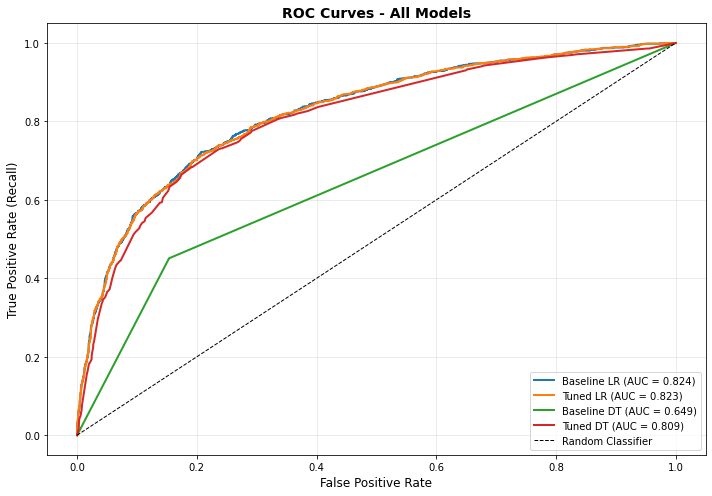

In [87]:

plt.figure(figsize=(10, 7))

models_roc = [
    ('Baseline LR', y_pred_proba_lr, roc_auc_score(y_test, y_pred_proba_lr)),
    ('Tuned LR', y_pred_proba_lr_tuned, roc_auc_score(y_test, y_pred_proba_lr_tuned)),
    ('Baseline DT', y_pred_proba_dt, roc_auc_score(y_test, y_pred_proba_dt)),
    ('Tuned DT', y_pred_proba_dt_tuned, roc_auc_score(y_test, y_pred_proba_dt_tuned))
]

for name, y_proba, auc in models_roc:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#### Reccomendations
1. Priority : Increase doctor-patient conversations about H1N1  Vaccine
   - Train healthcare providers on effective vaccine communication strategies
   - Implement reminder systems for doctors to discuss vaccines during visits
   
2. Address vaccine effectiveness misconceptions:
   - Launch targeted educational campaigns emphasizing vaccine benefits
   - Use evidence-based messaging to counter misinformation
   - Leverage trusted health authorities for communication
   
3. Target interventions based on risk perception:
   - High concern, low vaccination: Focus on reducing barriers (access, cost, convenience)
   - Low concern: Emphasize risk awareness through educational programs
   
4. Consider socioeconomic factors in campaign design:
   - Middle-income populations show surprisingly low uptake rates
   - Tailor messaging and access points to different demographic groups
   - Address time and resource constraints for working populations


#### Conclusion
This project demonstrates that vaccine uptake is strongly influenced by risk perception and belief systems, not just demographics. While logistic regression offers interpretability, tree-based models better capture complex decision-making patterns. The results suggest that public health interventions should focus on improving trust in vaccine effectiveness and addressing fear-related misconceptions.